# Lab - 2: Image Convolution Lab
**Date:** November 5, 2024

## Objective
- Understand the basics of **image convolution** and its applications in image processing.

## Requirements
- **Programming Language**: Python
- **Libraries**:
  - `matplotlib` for image loading and display
  - `opencv` for image manipulation and convolution operations
- **Environment**: Jupyter Notebook or any Python-compatible code editor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Step 1: Loading the Image
- Select an image from your directory.
- Load the image using `matplotlib` for display and `opencv` for processing.

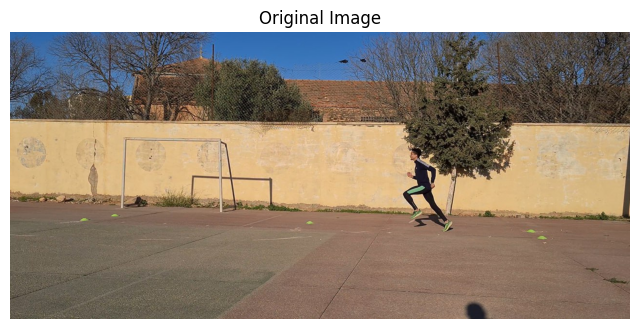

In [2]:
# Load the image
img = plt.imread('photo_2024-10-29_14-47-24.jpg')

# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()


### Step 2: Mean Filter
The **Mean Filter** is a basic convolution kernel that helps in **image blurring** by averaging pixel intensities in a defined neighborhood.

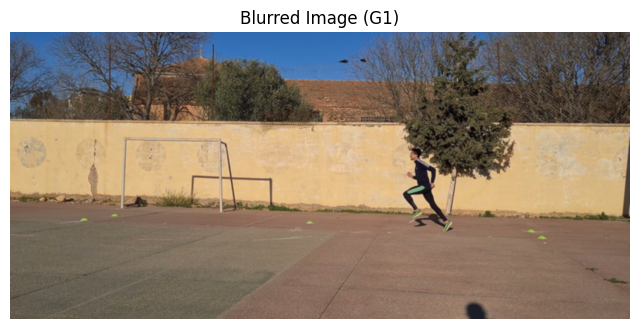

In [3]:
# Mean Filter (G1)
kernel_size = 3
G1 = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

blurred_img = cv2.filter2D(img, -1, G1)


plt.figure(figsize=(8, 6))
plt.imshow(blurred_img)
plt.title('Blurred Image (G1)')
plt.axis('off')
plt.show()

### Step 3: Creating New Kernels

1. **Create Filter G2**:
   - Define a filter `G2` that multiplies the image intensities by 2.

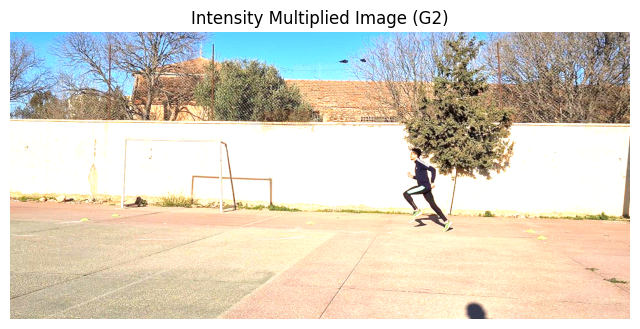

In [4]:
# G2: Multiply image intensities by 2
G2 = 2 * np.eye(1)


intensity_multiplied_img = cv2.filter2D(img, -1, G2) 

plt.figure(figsize=(8, 6))
plt.imshow(intensity_multiplied_img)
plt.title('Intensity Multiplied Image (G2)')
plt.axis('off')
plt.show()

2. **Create Filter G3**:
   - Define a **sharpening filter** `G3` in terms of `G1` and `G2`.
   - Apply `G2` and `G3` to the image.
   - **Observation**: Examine how the results change with each filter.

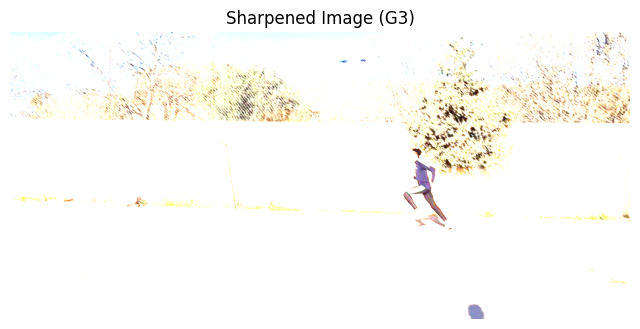

In [5]:
# G3: Sharpening filter (defined in terms of G1 and G2)
G3 = 2 * np.eye(3) - G1
sharpened_img = cv2.filter2D(img, -1, G3)

plt.figure(figsize=(8, 6))
plt.imshow(sharpened_img)
plt.title('Sharpened Image (G3)')
plt.axis('off')
plt.show()

### Step 4: Apply Filter G4

We’ll apply the `G4` filter to an image in two ways:
1. **Without Adjustment**: Display the image directly after applying `G4`, which may appear mostly black due to negative values.
2. **With Adjustment (+0.5)**: Add 0.5 to the resulting image to shift values into a more visible range.

This will illustrate the effect of the adjustment on the filtered image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


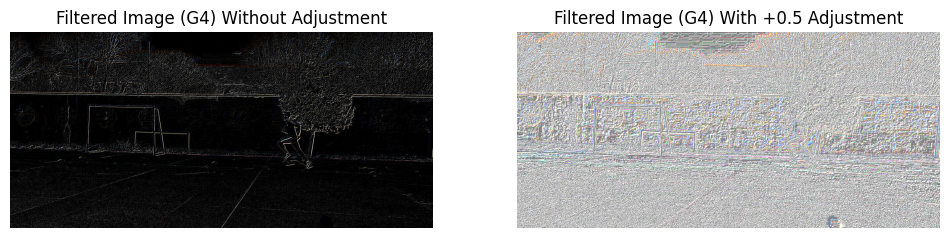

In [6]:
# Define filter G4
G4 = np.array([[-1, -1, 0], [-1, 3, 0], [0, 0, 0]], dtype=np.float32)

# Apply G4 filter without adjustment
filtered_img_G4_no_adjust = cv2.filter2D(img, -1, G4)

# Apply G4 filter with +0.5 adjustment
filtered_img_G4_adjusted = cv2.filter2D(img, -1, G4) + 0.5

# Display both results side-by-side
plt.figure(figsize=(12, 6))

# Without adjustment
plt.subplot(1, 2, 1)
plt.imshow(filtered_img_G4_no_adjust)
plt.title('Filtered Image (G4) Without Adjustment')
plt.axis('off')

# With +0.5 adjustment
plt.subplot(1, 2, 2)
plt.imshow(filtered_img_G4_adjusted)
plt.title('Filtered Image (G4) With +0.5 Adjustment')
plt.axis('off')

plt.show()

### Step 5: Blurring with G1
- **Increasing Blur**: To increase the blur, apply `G1` repeatedly. 
- **Twice-blurred Image**: This process is equivalent to performing the operation \((F ∗ G1) ∗ G1\).
- **Observation**: Compare the results with the original blurred image.

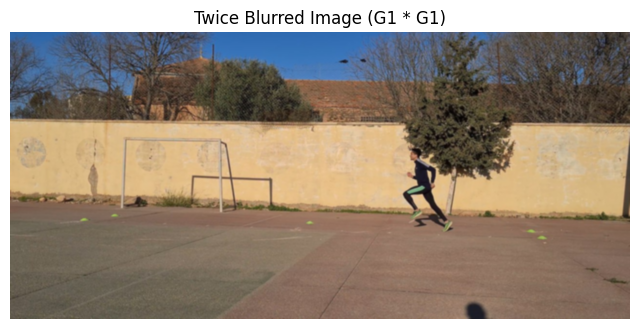

In [7]:
# Twice Blurred Image (G1 * G1)
twice_blurred_img = cv2.filter2D(blurred_img, -1, G1)

plt.figure(figsize=(8, 6))
plt.imshow(twice_blurred_img)
plt.title('Twice Blurred Image (G1 * G1)')
plt.axis('off')
plt.show()

### Step 6: Apply Sobel Filter
The **Sobel Filter** is useful for detecting edges by highlighting gradients in specific directions.

1. **Horizontal Edge Detection**:
   - Apply the Sobel Filter for **horizontal edges** to the loaded image.

2. **Vertical Edge Detection**:
   - Apply the Sobel Filter for **vertical edges** to the image.

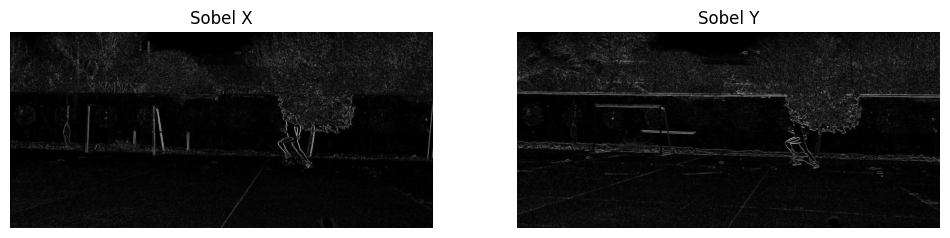

In [8]:
# Sobel filters
gray_img = cv2.cvtColor(img.astype(np.uint8) * 255, cv2.COLOR_RGB2GRAY).astype(np.float32) / 255  # Convert to grayscale if needed

sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(sobelx), cmap='gray') 
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(sobely), cmap='gray') 
plt.title('Sobel Y')
plt.axis('off')
plt.show()

## Conclusion
Through this lab, we gained insights into **image convolution** by:

- Applying and understanding the effects of various convolution filters.
- Observing the blurring, sharpening, and edge detection capabilities of different filters.
- Experimenting with **Mean Filter**, **Custom Kernels**, and the **Sobel Filter** to achieve different image transformations.

These techniques serve as essential tools for image processing tasks, providing a foundation for more advanced image analysis and manipulation in Python.

## Purpose of Applying these Techniques:

### Blurring (G1, G1*G1):
Used for noise reduction, smoothing images, and as a pre-processing step for other operations. Twice blurring increases the blur effect.
### Intensity Adjustment (G2):
 Used to correct under- or over-exposed images, or for artistic effects.
### Sharpening (G3):
 Enhances details and makes images appear crisper, especially useful for images that are slightly blurry.
### Edge Detection (Sobel):
 Important for feature extraction, object recognition, and image segmentation.